In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [24]:
covid_data = pd.read_csv("covid19.csv")
covid_data.head()

,id,location,country,gender,age,vis_wuhan,from_wuhan,fever,dry cough,difficulty in breathing,tiredness,soar_throat,nasal_congestion,diff_symptoms,result
0,0,104,8,1,66,1,0,0,0,0,1,1,1,1,1
1,1,101,8,0,56,0,1,0,0,0,1,0,1,0,0
2,2,137,8,1,46,0,1,0,0,0,1,0,1,1,0
3,3,116,8,0,60,1,0,0,0,0,1,0,1,0,0
4,4,116,8,1,58,0,0,0,0,0,1,0,1,0,0


In [25]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   id                       863 non-null    int64
 1   location                 863 non-null    int64
 2   country                  863 non-null    int64
 3   gender                   863 non-null    int64
 4   age                      863 non-null    int64
 5   vis_wuhan                863 non-null    int64
 6   from_wuhan               863 non-null    int64
 7   fever                    863 non-null    int64
 8   dry cough                863 non-null    int64
 9   difficulty in breathing  863 non-null    int64
 10  tiredness                863 non-null    int64
 11  soar_throat              863 non-null    int64
 12  nasal_congestion         863 non-null    int64
 13  diff_symptoms            863 non-null    int64
 14  result                   863 non-null    int64
dtypes: int

In [26]:
print(covid_data["result"].value_counts())


0    754
1    109
Name: result, dtype: int64


In [27]:
#preprocessing stage

In [28]:
# drop unuseful dataset
covid_data = covid_data.drop(["id","location","country","vis_wuhan","from_wuhan"], axis=1)
covid_data.head()

,gender,age,fever,dry cough,difficulty in breathing,tiredness,soar_throat,nasal_congestion,diff_symptoms,result
0,1,66,0,0,0,1,1,1,1,1
1,0,56,0,0,0,1,0,1,0,0
2,1,46,0,0,0,1,0,1,1,0
3,0,60,0,0,0,1,0,1,0,0
4,1,58,0,0,0,1,0,1,0,0


In [29]:
covid_data.isnull()

,gender,age,fever,dry cough,difficulty in breathing,tiredness,soar_throat,nasal_congestion,diff_symptoms,result
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
858,False,False,False,False,False,False,False,False,False,False
859,False,False,False,False,False,False,False,False,False,False
860,False,False,False,False,False,False,False,False,False,False
861,False,False,False,False,False,False,False,False,False,False


In [30]:
covid_data.describe()

,gender,age,fever,dry cough,difficulty in breathing,tiredness,soar_throat,nasal_congestion,diff_symptoms,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,0.849363,49.631518,0.252607,0.159907,0.068366,0.984936,0.311703,0.998841,0.271147,0.126304
std,0.726062,14.925213,0.434759,0.366733,0.252520,0.121877,0.463458,0.034040,0.444810,0.332384
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,40.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,50.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,57.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,2.000000,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


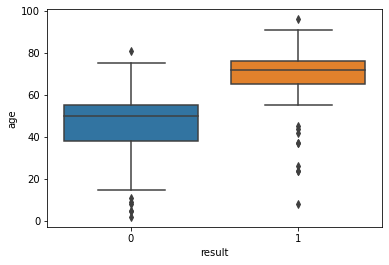

In [31]:
#detecting outliers
# note having covid19 does not medically depend on any specific age so outlier cannot be remove
sns.boxplot(data=covid_data,y="age",x="result")
plt.show()

unique value:
 [1 0]

unique value:
 0    754
1    109
Name: result, dtype: int64


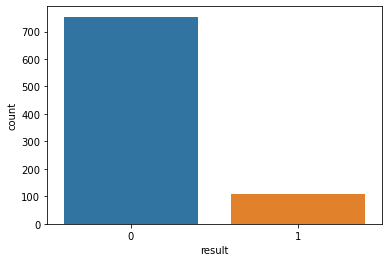

In [32]:
#imbalanced dataset
print("unique value:\n",covid_data["result"].unique())
print("\nunique value:\n",covid_data["result"].value_counts())
sns.countplot(data=covid_data,x='result')
plt.show()

In [33]:
#split train_test data
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

x = covid_data.drop(["result"],axis=1)
y = covid_data["result"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)


In [34]:
#balancing the dataset
from collections import Counter
from imblearn.combine import SMOTEENN

#summarize class distribution
print("Before oversampling:", Counter(y))

#define oversampling strategie
smote = SMOTEENN(random_state=1)

# fit and apply the transform
x_train,y_train = smote.fit_resample(x_train,y_train)

#summarize class distribution

print("After oversampling:",Counter(y_train))
 


Before oversampling: Counter({0: 754, 1: 109})
After oversampling: Counter({1: 464, 0: 405})


<AxesSubplot:xlabel='result', ylabel='count'>

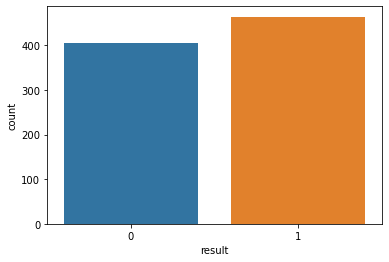

In [35]:
sns.countplot(data=covid_data,x=y_train)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       223
           1       0.59      0.67      0.62        36

    accuracy                           0.89       259
   macro avg       0.77      0.80      0.78       259
weighted avg       0.89      0.89      0.89       259



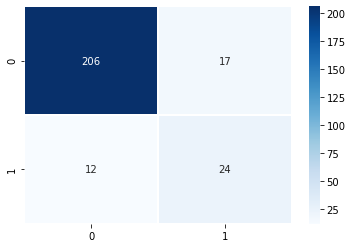

0.5040163993835449 second


In [52]:
# using randomforest Algorithm

import time
start = time.time()
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=50, random_state=1)
rf.fit(x_train,y_train)
pred = rf.predict(x_test)

print(classification_report(y_test,pred))


confus = confusion_matrix(y_test,pred)
sns.heatmap(confus, annot=True, cmap="Blues",linewidths=1,fmt="d") 
plt.show()

end = time.time()
print(end - start,'second')

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       223
           1       0.61      0.69      0.65        36

    accuracy                           0.90       259
   macro avg       0.78      0.81      0.79       259
weighted avg       0.90      0.90      0.90       259



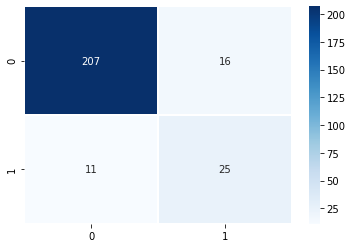

0.5298378467559814 second


In [51]:
#using adaboost algorithm
import time
start = time.time()

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50,learning_rate=1,random_state = 1)
ada.fit(x_train,y_train)
pred_ada = ada.predict(x_test)


print(classification_report(y_test,pred_ada))


confus = confusion_matrix(y_test,pred_ada)
sns.heatmap(confus, annot=True, cmap="Blues",linewidths=1,fmt="d") 
plt.show()

end = time.time()
print(end - start,'second')


              precision    recall  f1-score   support

           0       0.95      0.89      0.92       223
           1       0.51      0.72      0.60        36

    accuracy                           0.86       259
   macro avg       0.73      0.81      0.76       259
weighted avg       0.89      0.86      0.87       259



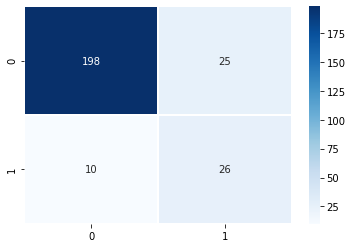

0.9783830642700195 second


In [50]:
import time
start = time.time()

# combining  logistic regression with adaboostclassifer
from sklearn.linear_model import LogisticRegression

logis = LogisticRegression(solver="lbfgs",max_iter=1000)
abc_logis =  AdaBoostClassifier(n_estimators=50, base_estimator=logis, learning_rate=1,random_state = 1)
abc_logis.fit(x_train,y_train)
pred_abc_logis = abc_logis.predict(x_test)

print( classification_report(y_test,pred_abc_logis))

confus = confusion_matrix(y_test,pred_abc_logis)
sns.heatmap(confus, annot=True, cmap="Blues",linewidths=1,fmt="d") 
plt.show()

end = time.time()
print(end-start,'second')